# Machine learning

### Library

In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

## Data Preprocessing  

### Load Dataset  

In [298]:
data = pd.read_csv("hotels_in_europe.csv")
data.head(180)

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Motel One Berlin-Tiergarten,"Tempelhof-Schöneberg, Berlin","IRR 4,162,996",8.2,Very good,"4,799 reviews",1 large double bed,NaN,2.5,Room with King Size bed,1 night,1 adult,NaN
176,Motel One Berlin-Alexanderplatz,"Mitte, Berlin","IRR 5,004,005",8.6,Fabulous,"12,885 reviews",1 large double bed,NaN,2.4,Queen Room,1 night,1 adult,NaN
177,Motel One Berlin-Upper West,"Charlottenburg-Wilmersdorf, Berlin","IRR 5,004,005",8.5,Very good,"7,597 reviews",1 large double bed,NaN,3.2,Room with King Size bed,1 night,1 adult,NaN
178,Grimm's Potsdamer Platz,"Mitte, Berlin","IRR 4,365,238",8.8,Fabulous,"8,375 reviews",1 single bed,NaN,1.5,Single Room,1 night,1 adult,Free cancellation


In [299]:
rows, columns = data.shape
print(rows , columns)

7322 13


### Understanding dataset and change them to numeric values

In [300]:
data.describe()

,rating,distance_from_center
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


#### Change price to numeric value

In [302]:
data['price'] = data['price'].str.replace('IRR', '').str.replace(',', '').astype(int, errors='ignore')
data['price']

0        7951542
1        1397677
2        7569083
3        6447737
4        7913496
          ...   
7317    31998398
7318    14817781
7319    30236284
7320    19503404
7321    25871045
Name: price, Length: 7322, dtype: int32

#### Change free cancellation to numeric values
Free cancellation is a positive feature, so we assign it a value of 1.0 for hotels that offer it, and 0.0 for those that do not.

In [303]:
def free_cancel(free):
    if pd.isna(free): 
        return 0.0
    else:
        return 1.0

data['free_cancellation'] = data['free_cancellation'].apply(free_cancel)


In [304]:
data.head(160)

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,0.0
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,0.0
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,0.0
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,0.0
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Grimm's Potsdamer Platz,"Mitte, Berlin",4365238,8.8,Fabulous,"8,375 reviews",1 single bed,NaN,1.5,Single Room,1 night,1 adult,1.0
156,Generator Berlin Alexanderplatz,"Mitte, Berlin",889067,7.4,Good,"4,965 reviews",1 bunk bed,NaN,2.9,Bed in 8-Bed Dormitory Room,1 night,1 adult,0.0
157,"Hotel Berlin, Berlin, a member of Radisson Ind...","Mitte, Berlin",6686023,8.0,Very good,"15,446 reviews",1 large double bed,NaN,2.1,Cosy Small Room,1 night,1 adult,1.0
158,Mercure Hotel Berlin Zentrum Superior,"Tempelhof-Schöneberg, Berlin",3964758,7.5,Good,"1,010 reviews",Beds: 1 double or 2 singles,NaN,2.7,Standard Double or Twin Room,1 night,1 adult,0.0


#### Chnage nights to numeric values

In [305]:
nights_counts = data['nights'].value_counts()
print(nights_counts)

1 night     2434
4 nights    1271
2 nights    1223
3 nights    1201
5 nights    1193
Name: nights, dtype: int64


In [306]:
data['nights'] = data['nights'].str.replace('nights', '').str.replace('night', '').astype(int, errors='ignore')
data['nights']

0       1
1       1
2       1
3       1
4       1
       ..
7317    4
7318    4
7319    4
7320    4
7321    4
Name: nights, Length: 7322, dtype: int32

In [307]:
rows, columns = data.shape
print(rows , columns)

7322 13


#### Change the quality to numeric values
In this section, we noticed that some values related to quality differ significantly from a considerable number of others. It seems that in this limited set, the rating field is empty, and its value is actually in the quality field, which we have separated. 

In [308]:
quality_counts = data['quality'].value_counts()
print(quality_counts)

Very good           2277
Good                2103
Review score        1262
Fabulous             977
Superb               388
Exceptional          122
Fabulous 8.7          15
Superb 9.0             8
Fabulous 8.9           4
Exceptional 9.6        4
Review score 6.4       4
Good 7.3               3
Very good 8.1          2
Name: quality, dtype: int64


In [309]:
specific_quality_values = ['Fabulous 8.7', 'Superb 9.0', 'Fabulous 8.9', 
                           'Exceptional 9.6', 'Review score 6.4', 
                           'Good 7.3', 'Very good 8.1']
filtered_rows = data[data['quality'].isin(specific_quality_values) & data['rating'].isna()]
count_filtered_rows = filtered_rows.shape[0]

print(f"Count of rows where quality is in the list and rating is NaN: {count_filtered_rows}")
print(filtered_rows[['quality', 'rating']])

Count of rows where quality is in the list and rating is NaN: 40
               quality  rating
1220          Good 7.3     NaN
1636        Superb 9.0     NaN
1660        Superb 9.0     NaN
1679        Superb 9.0     NaN
1704        Superb 9.0     NaN
1893      Fabulous 8.9     NaN
1894      Fabulous 8.7     NaN
1897   Exceptional 9.6     NaN
1911      Fabulous 8.7     NaN
1914   Exceptional 9.6     NaN
1916      Fabulous 8.9     NaN
1931      Fabulous 8.7     NaN
1935   Exceptional 9.6     NaN
1938      Fabulous 8.9     NaN
1961      Fabulous 8.9     NaN
1962      Fabulous 8.7     NaN
1965   Exceptional 9.6     NaN
1974      Fabulous 8.7     NaN
2003      Fabulous 8.7     NaN
2017      Fabulous 8.7     NaN
2042      Fabulous 8.7     NaN
2585  Review score 6.4     NaN
2600  Review score 6.4     NaN
2610      Fabulous 8.7     NaN
2628  Review score 6.4     NaN
2649  Review score 6.4     NaN
2659      Fabulous 8.7     NaN
2984        Superb 9.0     NaN
3004        Superb 9.0     NaN
3025 

In [310]:
def extract_rating(row):
    if isinstance(row['quality'], str):  
        
        try:
            rating = pd.to_numeric(row['quality'].split()[-1], errors='coerce')
            if pd.notna(rating):  
                row['quality'] = ' '.join(row['quality'].split()[:-1])  
                row['rating'] = rating 
        except Exception as e:
            pass  
    return row

data = data.apply(extract_rating, axis=1)

In [311]:
quality_counts = data['quality'].value_counts()
print(quality_counts)

Very good       2279
Good            2106
Review score    1266
Fabulous         996
Superb           396
Exceptional      126
Name: quality, dtype: int64


In this section, we notice that some hotels with the same features have been repeated multiple times, and we will remove those duplicates.

In [312]:
nan_rows = data[data['rating'].isna() | data['quality'].isna()]
print("Rows where 'rating' or 'quality' is NaN:")
nan_rows

Rows where 'rating' or 'quality' is NaN:


,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
628,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
645,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
656,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
673,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
957,Hakan Place near Stadium,"Charlottenburg-Wilmersdorf, Berlin",81518222,NaN,NaN,NaN,3 large double beds,120m²,8.7,Three-Bedroom Apartment,5,5 adults,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
6267,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
6290,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0
6316,Elegante Apt para 3 en Chueca a 1 min de Gran Via,"Centro, Madrid",2595114,NaN,NaN,NaN,"2 beds (1 double, 1 sofa bed)",20m²,0.8,Apartment,1,3 adults,0.0


In [313]:
quality_counts = nan_rows['name'].value_counts()
quality_counts

Orfila/Gambetta: Magnifique Appartement 6P                         30
Charmant appartement 18e arrondissement                            22
250 City Road 2 Bollinder Place EC1V 2AH 2bed LUXURY apartments    11
SUPER BIG APARTAMENT IN OPERA                                      11
Nets Inn apartments - Gare de Lyon II                              10
Elegante Apt para 3 en Chueca a 1 min de Gran Via                   9
Comfort and convenience close to Buttes Chaumont                    8
Pension Michael                                                     8
Hakan Place near Stadium                                            8
373 Suite Suzanne - Superbe Appartement à Paris                     6
Rent a modern and central flat                                      4
URBAN FLATS Berlin                                                  4
Premium Excel Penthouse                                             4
104-Beautiful apartment near champs elysees                         4
Superbe appartement 

In [314]:
#p = (data['name'] == 'Orfila/Gambetta: Magnifique Appartement 6P').sum()
#print(f"Count of rows with the given name: {p}")

In [315]:
identical_rows = data[data.duplicated(keep=False)]
identical_rows

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1,1 adult,0.0
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1,1 adult,0.0
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1,1 adult,0.0
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,"Mitte, Berlin",31998398,8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,NaN,0.9,Superior Double Room,4,2 adults,0.0
7318,Hotel Domicil Berlin by Golden Tulip,"Charlottenburg-Wilmersdorf, Berlin",14817781,7.7,Good,"1,546 reviews",2 single beds,NaN,4.9,Standard Twin Room,4,2 adults,0.0
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin",30236284,8.3,Very good,"5,813 reviews",Multiple bed types,NaN,2.8,Standard Room,4,2 adults,0.0
7320,Leonardo Hotel Berlin KU'DAMM,"Charlottenburg-Wilmersdorf, Berlin",19503404,8.0,Very good,"8,631 reviews",Beds: 1 double or 2 singles,NaN,3.9,Comfort Double Room,4,2 adults,1.0


In [316]:
data_unique = data.drop_duplicates(keep='first')
data_unique

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1,1 adult,0.0
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1,1 adult,0.0
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1,1 adult,0.0
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,Pullman Berlin Schweizerhof,"Mitte, Berlin",28674409,8.5,Very good,"5,560 reviews",2 single beds,NaN,2.5,Premium Superior Room,4,2 adults,0.0
7293,Eurostars Berlin,"Mitte, Berlin",31998398,8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,NaN,0.9,Superior Double Room,4,2 adults,0.0
7295,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin",30236284,8.3,Very good,"5,813 reviews",Multiple bed types,NaN,2.8,Standard Room,4,2 adults,0.0
7305,Hollywood Media Hotel am Kurfürstendamm,"Charlottenburg-Wilmersdorf, Berlin",30548658,8.3,Very good,"9,373 reviews",Multiple bed types,NaN,4.1,Deluxe Junior Suite,4,2 adults,0.0


Make sure that we dont have similar features for hotel after droping.

In [317]:
#wit_hotel_data = data_unique[data_unique['name'] == 'Orchard Hotel']
#wit_hotel_data

In [318]:
nan_rowss = data_unique[data_unique['rating'].isna() | data_unique['quality'].isna()]
print("Rows where 'rating' or 'quality' is NaN:")
nan_rowss
quality_counts = nan_rowss['name'].value_counts()
quality_counts


Rows where 'rating' or 'quality' is NaN:


Orfila/Gambetta: Magnifique Appartement 6P                         12
Charmant appartement 18e arrondissement                             7
250 City Road 2 Bollinder Place EC1V 2AH 2bed LUXURY apartments     6
SUPER BIG APARTAMENT IN OPERA                                       4
Premium Excel Penthouse                                             3
Comfort and convenience close to Buttes Chaumont                    3
Nets Inn apartments - Gare de Lyon II                               3
104-Beautiful apartment near champs elysees                         3
Heads on Bed - Docklands Canary wharf Excel (Larger Groups)         2
Pension Michael                                                     2
Hakan Place near Stadium                                            2
Superbe appartement à 1min à pieds du Métro Brochant                2
373 Suite Suzanne - Superbe Appartement à Paris                     2
Rent a modern and central flat                                      2
NR4 Deluxe Gran Via 

I preferred to remove these features from the data due to their small number.

In [319]:
data_unique_cleaned = data_unique.dropna(subset=['rating', 'quality'], how='any')
data_unique_cleaned

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1,1 adult,0.0
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1,1 adult,0.0
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1,1 adult,0.0
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,Pullman Berlin Schweizerhof,"Mitte, Berlin",28674409,8.5,Very good,"5,560 reviews",2 single beds,NaN,2.5,Premium Superior Room,4,2 adults,0.0
7293,Eurostars Berlin,"Mitte, Berlin",31998398,8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,NaN,0.9,Superior Double Room,4,2 adults,0.0
7295,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin",30236284,8.3,Very good,"5,813 reviews",Multiple bed types,NaN,2.8,Standard Room,4,2 adults,0.0
7305,Hollywood Media Hotel am Kurfürstendamm,"Charlottenburg-Wilmersdorf, Berlin",30548658,8.3,Very good,"9,373 reviews",Multiple bed types,NaN,4.1,Deluxe Junior Suite,4,2 adults,0.0


In [320]:
data_unique_cleanedd = data_unique_cleaned.drop('size' , axis = 1)
#data_unique_cleanedd
data_unique_cleanedd = data_unique_cleanedd.drop('location' , axis = 1)
data_unique_cleanedd = data_unique_cleanedd.drop('name' , axis = 1)

data_unique_cleanedd

,price,rating,quality,review,bed,distance_from_center,room_type,nights,adults,free_cancellation
0,7951542,7.1,Good,"3,300 reviews",1 double bed,1.9,Suite,1,1 adult,0.0
1,1397677,8.0,Very good,"5,921 reviews",1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,7569083,8.3,Very good,"2,532 reviews",1 single bed,3.4,Comfort Single Room,1,1 adult,0.0
3,6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,4.2,Classic Room,1,1 adult,0.0
4,7913496,8.3,Very good,"1,273 reviews",1 double bed,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...
7291,28674409,8.5,Very good,"5,560 reviews",2 single beds,2.5,Premium Superior Room,4,2 adults,0.0
7293,31998398,8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,0.9,Superior Double Room,4,2 adults,0.0
7295,30236284,8.3,Very good,"5,813 reviews",Multiple bed types,2.8,Standard Room,4,2 adults,0.0
7305,30548658,8.3,Very good,"9,373 reviews",Multiple bed types,4.1,Deluxe Junior Suite,4,2 adults,0.0


In [321]:
review_score_rows = data_unique_cleanedd[data_unique_cleanedd['quality'] == 'Review score']
review_score_rows
dataaaa = data_unique_cleanedd
dataaaa

,price,rating,quality,review,bed,distance_from_center,room_type,nights,adults,free_cancellation
0,7951542,7.1,Good,"3,300 reviews",1 double bed,1.9,Suite,1,1 adult,0.0
1,1397677,8.0,Very good,"5,921 reviews",1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,7569083,8.3,Very good,"2,532 reviews",1 single bed,3.4,Comfort Single Room,1,1 adult,0.0
3,6447737,8.6,Fabulous,"1,457 reviews",1 large double bed,4.2,Classic Room,1,1 adult,0.0
4,7913496,8.3,Very good,"1,273 reviews",1 double bed,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...
7291,28674409,8.5,Very good,"5,560 reviews",2 single beds,2.5,Premium Superior Room,4,2 adults,0.0
7293,31998398,8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,0.9,Superior Double Room,4,2 adults,0.0
7295,30236284,8.3,Very good,"5,813 reviews",Multiple bed types,2.8,Standard Room,4,2 adults,0.0
7305,30548658,8.3,Very good,"9,373 reviews",Multiple bed types,4.1,Deluxe Junior Suite,4,2 adults,0.0


In [322]:
quality_values = ['Very good', 'Good', 'Fabulous', 'Superb', 'Exceptional']

for quality in quality_values:
    
    ratings = dataaaa[dataaaa['quality'] == quality]['rating']
    mean_rating = ratings.mean()
    median_rating = ratings.median()
    min_rating = ratings.min()
      
    print(f"Quality: {quality}")
    print(f"  Mean rating: {mean_rating}")
    print(f"  Median rating: {median_rating}")
    print(f"  Min rating: {min_rating}\n")

def Rev2qual(rating):
    
    if rating < 7.0:
        return 'Bad'
    elif 7.0 <= rating < 8.0:
        return 'Good'
    elif 8.0 <= rating < 8.6:
        return 'Very good'
    elif 8.6 <= rating < 9.0:
        return 'Fabulous'
    elif 9.0 <= rating < 9.5:
        return 'Superb'
    elif rating >= 9.5:
        return 'Exceptional'
    else:
        return None  

dataaaa.loc[dataaaa['quality'] == 'Review score' , 'quality' ] = (
    dataaaa.loc[dataaaa['quality'] == 'Review score', 'rating']
    .apply(Rev2qual)
)

dataaaa[['rating', 'quality']]

count_Rev_quality = dataaaa[dataaaa['quality'] == 'Review score'].shape[0]
count_bad_quality = dataaaa[dataaaa['quality'] == 'Bad'].shape[0]

print(f"Number of rows with quality = 'Review score': {count_Rev_quality}")
print(f"Number of rows with quality = 'Bad': {count_bad_quality}")


Quality: Very good
  Mean rating: 8.234602076124567
  Median rating: 8.2
  Min rating: 8.0

Quality: Good
  Mean rating: 7.496803069053708
  Median rating: 7.5
  Min rating: 7.0

Quality: Fabulous
  Mean rating: 8.730666666666666
  Median rating: 8.7
  Min rating: 8.6

Quality: Superb
  Mean rating: 9.124223602484472
  Median rating: 9.1
  Min rating: 9.0

Quality: Exceptional
  Mean rating: 9.701923076923077
  Median rating: 9.649999999999999
  Min rating: 9.5

Number of rows with quality = 'Review score': 0
Number of rows with quality = 'Bad': 485


In [323]:
data_unique_cleanedd[['rating', 'quality']]
dataaaa[['rating', 'quality']]


,rating,quality
0,7.1,Good
1,8.0,Very good
2,8.3,Very good
3,8.6,Fabulous
4,8.3,Very good
...,...,...
7291,8.5,Very good
7293,8.0,Very good
7295,8.3,Very good
7305,8.3,Very good


In [324]:
quality_mapping = {
    'Bad': 1,
    'Good': 2,
    'Very good': 3,
    'Fabulous': 4,
    'Superb': 5,
    'Exceptional': 6
}

dataaaa['quality'] = dataaaa['quality'].map(quality_mapping)
dataaaa

,price,rating,quality,review,bed,distance_from_center,room_type,nights,adults,free_cancellation
0,7951542,7.1,2,"3,300 reviews",1 double bed,1.9,Suite,1,1 adult,0.0
1,1397677,8.0,3,"5,921 reviews",1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,1 adult,0.0
2,7569083,8.3,3,"2,532 reviews",1 single bed,3.4,Comfort Single Room,1,1 adult,0.0
3,6447737,8.6,4,"1,457 reviews",1 large double bed,4.2,Classic Room,1,1 adult,0.0
4,7913496,8.3,3,"1,273 reviews",1 double bed,4.1,Comfort Double Room,1,1 adult,0.0
...,...,...,...,...,...,...,...,...,...,...
7291,28674409,8.5,3,"5,560 reviews",2 single beds,2.5,Premium Superior Room,4,2 adults,0.0
7293,31998398,8.0,3,"5,933 reviews",Beds: 1 double or 2 singles,0.9,Superior Double Room,4,2 adults,0.0
7295,30236284,8.3,3,"5,813 reviews",Multiple bed types,2.8,Standard Room,4,2 adults,0.0
7305,30548658,8.3,3,"9,373 reviews",Multiple bed types,4.1,Deluxe Junior Suite,4,2 adults,0.0


In [325]:
dataaaa['review'] = data['review'].str.replace('reviews', '').str.replace('review', '').str.replace('external', '').str.replace(',', '').astype(int, errors='ignore')
dataaaa['review']

0       3300 
1       5921 
2       2532 
3       1457 
4       1273 
        ...  
7291    5560 
7293    5933 
7295    5813 
7305    9373 
7313    5478 
Name: review, Length: 2722, dtype: object

In [326]:
non_numeric_reviews = dataaaa[~dataaaa['review'].apply(pd.to_numeric, errors='coerce').notna()]
print(non_numeric_reviews['review'].value_counts())

Series([], Name: review, dtype: int64)


In [327]:
dataaaa['adults'] = data['adults'].str.replace('adults', '').str.replace('adult', '').astype(int, errors='ignore')
dataaaa['adults']

0       1
1       1
2       1
3       1
4       1
       ..
7291    2
7293    2
7295    2
7305    2
7313    2
Name: adults, Length: 2722, dtype: int32

In [328]:
dataaaa.head()

,price,rating,quality,review,bed,distance_from_center,room_type,nights,adults,free_cancellation
0,7951542,7.1,2,3300,1 double bed,1.9,Suite,1,1,0.0
1,1397677,8.0,3,5921,1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,1,0.0
2,7569083,8.3,3,2532,1 single bed,3.4,Comfort Single Room,1,1,0.0
3,6447737,8.6,4,1457,1 large double bed,4.2,Classic Room,1,1,0.0
4,7913496,8.3,3,1273,1 double bed,4.1,Comfort Double Room,1,1,0.0


In [329]:
dataaaa['price_per_night'] = dataaaa['price'] / dataaaa['nights']
dataaaa[['price', 'nights', 'price_per_night']]


,price,nights,price_per_night
0,7951542,1,7951542.00
1,1397677,1,1397677.00
2,7569083,1,7569083.00
3,6447737,1,6447737.00
4,7913496,1,7913496.00
...,...,...,...
7291,28674409,4,7168602.25
7293,31998398,4,7999599.50
7295,30236284,4,7559071.00
7305,30548658,4,7637164.50


So far, we have handled the data for price, rating, quality, review, distance_from_center, nights, adults and free_cancellation

In [330]:
data_PRQRDNAF = dataaaa
data_PRQRDNAF = data_PRQRDNAF.drop('price' , axis = 1)
data_PRQRDNAF = data_PRQRDNAF.drop('nights' , axis = 1)
data_PRQRDNAF

,rating,quality,review,bed,distance_from_center,room_type,adults,free_cancellation,price_per_night
0,7.1,2,3300,1 double bed,1.9,Suite,1,0.0,7951542.00
1,8.0,3,5921,1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,0.0,1397677.00
2,8.3,3,2532,1 single bed,3.4,Comfort Single Room,1,0.0,7569083.00
3,8.6,4,1457,1 large double bed,4.2,Classic Room,1,0.0,6447737.00
4,8.3,3,1273,1 double bed,4.1,Comfort Double Room,1,0.0,7913496.00
...,...,...,...,...,...,...,...,...,...
7291,8.5,3,5560,2 single beds,2.5,Premium Superior Room,2,0.0,7168602.25
7293,8.0,3,5933,Beds: 1 double or 2 singles,0.9,Superior Double Room,2,0.0,7999599.50
7295,8.3,3,5813,Multiple bed types,2.8,Standard Room,2,0.0,7559071.00
7305,8.3,3,9373,Multiple bed types,4.1,Deluxe Junior Suite,2,0.0,7637164.50


In [331]:
data_PRQRDNAF['rating'] = pd.to_numeric(data_PRQRDNAF['rating'], errors='coerce')
data_PRQRDNAF['review'] = pd.to_numeric(data_PRQRDNAF['review'], errors='coerce')

data_PRQRDNAF = data_PRQRDNAF.dropna(subset=['rating', 'review'])

total_reviews = data_PRQRDNAF['rating'].sum()

data_PRQRDNAF['normalized_review'] = data_PRQRDNAF['rating'] / total_reviews

data_PRQRDNAF['adjusted_rating'] = data_PRQRDNAF['normalized_review'] * data_PRQRDNAF['review']

print(data_PRQRDNAF[['rating', 'review', 'normalized_review', 'adjusted_rating']])


      rating  review  normalized_review  adjusted_rating
0        7.1    3300           0.000337         1.111448
1        8.0    5921           0.000379         2.246995
2        8.3    2532           0.000394         0.996917
3        8.6    1457           0.000408         0.594395
4        8.3    1273           0.000394         0.501214
...      ...     ...                ...              ...
7291     8.5    5560           0.000403         2.241872
7293     8.0    5933           0.000379         2.251549
7295     8.3    5813           0.000394         2.288735
7305     8.3    9373           0.000394         3.690403
7313     8.1    5478           0.000384         2.104864

[2722 rows x 4 columns]


In [332]:
data_PRQRDNAF

,rating,quality,review,bed,distance_from_center,room_type,adults,free_cancellation,price_per_night,normalized_review,adjusted_rating
0,7.1,2,3300,1 double bed,1.9,Suite,1,0.0,7951542.00,0.000337,1.111448
1,8.0,3,5921,1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,0.0,1397677.00,0.000379,2.246995
2,8.3,3,2532,1 single bed,3.4,Comfort Single Room,1,0.0,7569083.00,0.000394,0.996917
3,8.6,4,1457,1 large double bed,4.2,Classic Room,1,0.0,6447737.00,0.000408,0.594395
4,8.3,3,1273,1 double bed,4.1,Comfort Double Room,1,0.0,7913496.00,0.000394,0.501214
...,...,...,...,...,...,...,...,...,...,...,...
7291,8.5,3,5560,2 single beds,2.5,Premium Superior Room,2,0.0,7168602.25,0.000403,2.241872
7293,8.0,3,5933,Beds: 1 double or 2 singles,0.9,Superior Double Room,2,0.0,7999599.50,0.000379,2.251549
7295,8.3,3,5813,Multiple bed types,2.8,Standard Room,2,0.0,7559071.00,0.000394,2.288735
7305,8.3,3,9373,Multiple bed types,4.1,Deluxe Junior Suite,2,0.0,7637164.50,0.000394,3.690403


In [333]:
data_PRQRDNAF=data_PRQRDNAF.drop('normalized_review' , axis = 1)

In [334]:
data_a_PRQRDNAF = data_PRQRDNAF

In [335]:
# Extract the number of beds from the description
extracted_beds = data_a_PRQRDNAF['bed'].str.extract(
    r'(\d+)(?=\s+beds)|(\d+)(?=\s+(double|single|queen|sofa|large|bunk|extra-large))'
)

# Combine the extracted values into a single column
data_a_PRQRDNAF['Number of Beds'] = extracted_beds.bfill(axis=1).iloc[:, 0]

# Convert to numeric, and set unclear cases to NaN
data_a_PRQRDNAF['Number of Beds'] = pd.to_numeric(data_a_PRQRDNAF['Number of Beds'], errors='coerce')

# Display the DataFrame
data_a_PRQRDNAF


,rating,quality,review,bed,distance_from_center,room_type,adults,free_cancellation,price_per_night,adjusted_rating,Number of Beds
0,7.1,2,3300,1 double bed,1.9,Suite,1,0.0,7951542.00,1.111448,1.0
1,8.0,3,5921,1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,0.0,1397677.00,2.246995,1.0
2,8.3,3,2532,1 single bed,3.4,Comfort Single Room,1,0.0,7569083.00,0.996917,1.0
3,8.6,4,1457,1 large double bed,4.2,Classic Room,1,0.0,6447737.00,0.594395,1.0
4,8.3,3,1273,1 double bed,4.1,Comfort Double Room,1,0.0,7913496.00,0.501214,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7291,8.5,3,5560,2 single beds,2.5,Premium Superior Room,2,0.0,7168602.25,2.241872,2.0
7293,8.0,3,5933,Beds: 1 double or 2 singles,0.9,Superior Double Room,2,0.0,7999599.50,2.251549,1.0
7295,8.3,3,5813,Multiple bed types,2.8,Standard Room,2,0.0,7559071.00,2.288735,NaN
7305,8.3,3,9373,Multiple bed types,4.1,Deluxe Junior Suite,2,0.0,7637164.50,3.690403,NaN


In [336]:
Number = data_a_PRQRDNAF['Number of Beds'].value_counts(dropna=False)
print(Number)


2.0     821
1.0     768
3.0     531
4.0     267
NaN     191
6.0      55
5.0      52
7.0      12
9.0       9
8.0       8
11.0      5
12.0      1
14.0      1
10.0      1
Name: Number of Beds, dtype: int64


In [337]:
# Replace corresponding values in 'Number of Beds' based on 'bed' column
data_a_PRQRDNAF.loc[data_a_PRQRDNAF['bed'] == 'Multiple bed types', 'Number of Beds'] = 1.0

# Verify the changes


In [338]:
# Filter rows where 'Number of Beds' is NaN
rows_with_nan = data_a_PRQRDNAF[pd.isna(data_a_PRQRDNAF['Number of Beds'])]

# Display the rows
rows_with_nan


,rating,quality,review,bed,distance_from_center,room_type,adults,free_cancellation,price_per_night,adjusted_rating,Number of Beds
399,8.9,4,2751,NaN,350.0,King Room with View,2,0.0,1.918302e+07,1.161442,NaN
1636,9.0,5,10,Entire apartment • 2 bathrooms • 1 kitchen • 70m²,12.2,Apartment,5,0.0,5.566680e+06,0.004269,NaN
1739,8.7,4,1709,NaN,1.8,Apartment Standard,4,0.0,6.543853e+06,0.705307,NaN
1841,8.7,4,1709,NaN,1.8,Apartment Standard,4,0.0,5.859031e+06,0.705307,NaN
2146,8.7,4,1709,NaN,1.8,Apartment Standard,5,0.0,6.239487e+06,0.705307,NaN
2428,8.7,4,1709,NaN,1.8,Apartment Standard,4,0.0,6.372647e+06,0.705307,NaN
2984,9.0,5,10,Entire apartment • 2 bathrooms • 1 kitchen • 70m²,12.2,Apartment,4,0.0,5.566680e+06,0.004269,NaN
3307,6.9,1,57,Entire studio • 1 bathroom • 18m²,3.3,Studio with Balcony,4,0.0,2.219463e+07,0.018657,NaN
3354,6.9,1,57,Entire studio • 1 bathroom • 18m²,3.3,Studio with Balcony,4,0.0,1.997517e+07,0.018657,NaN
3472,8.7,4,1709,NaN,1.8,Apartment Standard,5,0.0,6.753104e+06,0.705307,NaN


In [339]:
import pandas as pd

data_a_PRQRDNAF = data_a_PRQRDNAF.dropna(subset=['Number of Beds'])
data_a_PRQRDNAF

,rating,quality,review,bed,distance_from_center,room_type,adults,free_cancellation,price_per_night,adjusted_rating,Number of Beds
0,7.1,2,3300,1 double bed,1.9,Suite,1,0.0,7951542.00,1.111448,1.0
1,8.0,3,5921,1 single bed,4.6,Single Bed in 6-Bed Dormitory Room,1,0.0,1397677.00,2.246995,1.0
2,8.3,3,2532,1 single bed,3.4,Comfort Single Room,1,0.0,7569083.00,0.996917,1.0
3,8.6,4,1457,1 large double bed,4.2,Classic Room,1,0.0,6447737.00,0.594395,1.0
4,8.3,3,1273,1 double bed,4.1,Comfort Double Room,1,0.0,7913496.00,0.501214,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7291,8.5,3,5560,2 single beds,2.5,Premium Superior Room,2,0.0,7168602.25,2.241872,2.0
7293,8.0,3,5933,Beds: 1 double or 2 singles,0.9,Superior Double Room,2,0.0,7999599.50,2.251549,1.0
7295,8.3,3,5813,Multiple bed types,2.8,Standard Room,2,0.0,7559071.00,2.288735,1.0
7305,8.3,3,9373,Multiple bed types,4.1,Deluxe Junior Suite,2,0.0,7637164.50,3.690403,1.0


# Models

In [340]:
data_Alaki = data_a_PRQRDNAF.drop('bed' , axis = 1)
data_Alaki = data_Alaki.drop('room_type' , axis = 1)
data_Alaki = data_Alaki.astype(float)
data_Alaki

,rating,quality,review,distance_from_center,adults,free_cancellation,price_per_night,adjusted_rating,Number of Beds
0,7.1,2.0,3300.0,1.9,1.0,0.0,7951542.00,1.111448,1.0
1,8.0,3.0,5921.0,4.6,1.0,0.0,1397677.00,2.246995,1.0
2,8.3,3.0,2532.0,3.4,1.0,0.0,7569083.00,0.996917,1.0
3,8.6,4.0,1457.0,4.2,1.0,0.0,6447737.00,0.594395,1.0
4,8.3,3.0,1273.0,4.1,1.0,0.0,7913496.00,0.501214,1.0
...,...,...,...,...,...,...,...,...,...
7291,8.5,3.0,5560.0,2.5,2.0,0.0,7168602.25,2.241872,2.0
7293,8.0,3.0,5933.0,0.9,2.0,0.0,7999599.50,2.251549,1.0
7295,8.3,3.0,5813.0,2.8,2.0,0.0,7559071.00,2.288735,1.0
7305,8.3,3.0,9373.0,4.1,2.0,0.0,7637164.50,3.690403,1.0


In [341]:
def label_price(price_per_night):
    median_price = data_PRQRDNAF['price_per_night'].median()
    if price_per_night > median_price:
        return 1
    else:
        return 0

data_Alaki['label'] = data_Alaki['price_per_night'].apply(label_price)
data_Alaki.head(180)

count_label_0 = (data_Alaki['label'] == 0).sum()
count_label_1 = (data_Alaki['label'] == 1).sum()

print(f"Number of rows with label 0: {count_label_0}")
print(f"Number of rows with label 1: {count_label_1}")


Number of rows with label 0: 1354
Number of rows with label 1: 1357


In [342]:
data_Alaki = data_Alaki.drop('price_per_night' , axis = 1)
data_Alaki

,rating,quality,review,distance_from_center,adults,free_cancellation,adjusted_rating,Number of Beds,label
0,7.1,2.0,3300.0,1.9,1.0,0.0,1.111448,1.0,0
1,8.0,3.0,5921.0,4.6,1.0,0.0,2.246995,1.0,0
2,8.3,3.0,2532.0,3.4,1.0,0.0,0.996917,1.0,0
3,8.6,4.0,1457.0,4.2,1.0,0.0,0.594395,1.0,0
4,8.3,3.0,1273.0,4.1,1.0,0.0,0.501214,1.0,0
...,...,...,...,...,...,...,...,...,...
7291,8.5,3.0,5560.0,2.5,2.0,0.0,2.241872,2.0,0
7293,8.0,3.0,5933.0,0.9,2.0,0.0,2.251549,1.0,0
7295,8.3,3.0,5813.0,2.8,2.0,0.0,2.288735,1.0,0
7305,8.3,3.0,9373.0,4.1,2.0,0.0,3.690403,1.0,0



Correlation Matrix:
                        rating   quality    review  distance_from_center  \
rating                1.000000  0.836327  0.131090              0.107192   
quality               0.836327  1.000000  0.060707              0.137714   
review                0.131090  0.060707  1.000000              0.021742   
distance_from_center  0.107192  0.137714  0.021742              1.000000   
adults               -0.158978 -0.114998 -0.342842              0.026870   
free_cancellation     0.017100 -0.011321  0.398806             -0.072218   
adjusted_rating       0.182849  0.111053  0.992773              0.036374   
Number of Beds       -0.121055 -0.069005 -0.308750              0.003206   
label                 0.322701  0.360909  0.012989              0.161779   

                        adults  free_cancellation  adjusted_rating  \
rating               -0.158978           0.017100         0.182849   
quality              -0.114998          -0.011321         0.111053   
review  

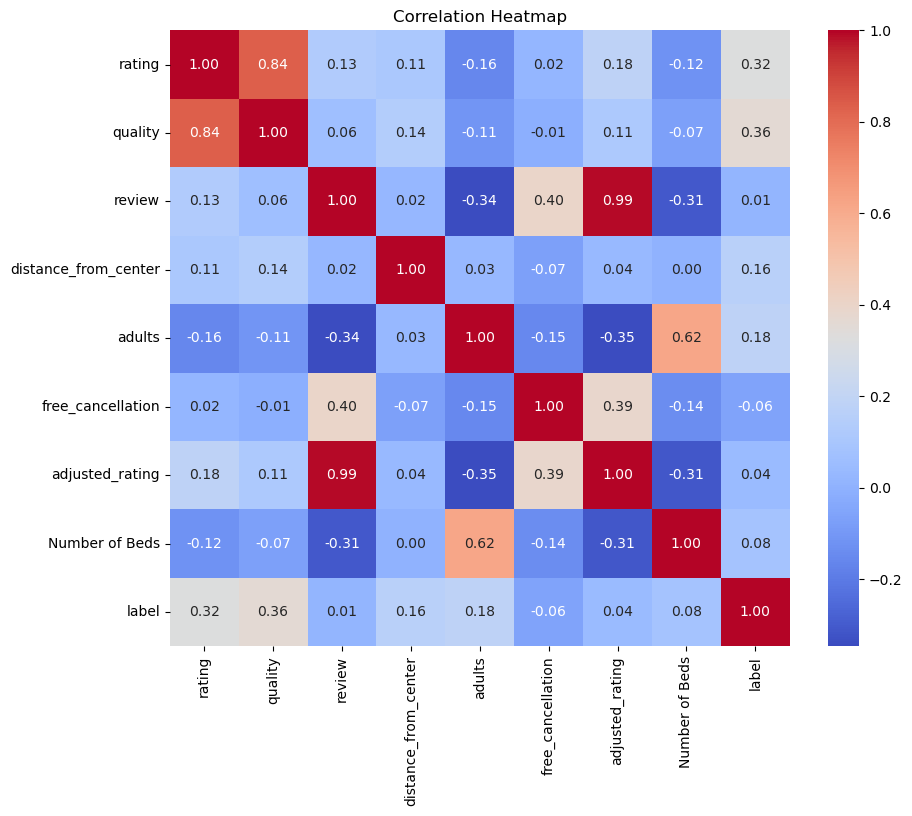

In [343]:
import seaborn as sns

correlation_matrix = data_Alaki.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Normalized Data

In [344]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['rating', 'adjusted_rating', 'distance_from_center', 'adults','review']

print("Original Data:")
print(data_Alaki[numeric_features].head())


scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_Alaki[numeric_features])


normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

print("\nNormalized Data:")
print(normalized_df.head())


Original Data:
   rating  adjusted_rating  distance_from_center  adults  review
0     7.1         1.111448                   1.9     1.0  3300.0
1     8.0         2.246995                   4.6     1.0  5921.0
2     8.3         0.996917                   3.4     1.0  2532.0
3     8.6         0.594395                   4.2     1.0  1457.0
4     8.3         0.501214                   4.1     1.0  1273.0

Normalized Data:
     rating  adjusted_rating  distance_from_center    adults    review
0 -0.553623         0.008074             -0.272795 -1.925478  0.099234
1  0.222958         0.786464             -0.238158 -1.925478  0.782081
2  0.481818        -0.070435             -0.253552 -1.925478 -0.100852
3  0.740679        -0.346354             -0.243290 -1.925478 -0.380921
4  0.481818        -0.410227             -0.244572 -1.925478 -0.428859


In [357]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_Alaki[['rating', 'quality', 'adjusted_rating', 'distance_from_center', 'adults', 'free_cancellation','review','Number of Beds']] 
y = data_Alaki['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Naive Baysian

In [358]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_scaled, y_train)
y_pred = nb_classifier.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))



Confusion Matrix:
[[221  51]
 [113 158]]

Accuracy: 69.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       272
           1       0.76      0.58      0.66       271

    accuracy                           0.70       543
   macro avg       0.71      0.70      0.69       543
weighted avg       0.71      0.70      0.69       543


Micro Average - Precision: 0.70, Recall: 0.70, F1-Score: 0.70
Macro Average - Precision: 0.71, Recall: 0.70, F1-Score: 0.69
Weighted Average - Precision: 0.71, Recall: 0.70, F1-Score: 0.69


## Decision Tree

In [359]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train_scaled, y_train)

y_pred = best_dt_classifier.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))




Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[237  35]
 [ 17 254]]

Accuracy: 90.42%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       272
           1       0.88      0.94      0.91       271

    accuracy                           0.90       543
   macro avg       0.91      0.90      0.90       543
weighted avg       0.91      0.90      0.90       543


Micro Average - Precision: 0.90, Recall: 0.90, F1-Score: 0.90
Macro Average - Precision: 0.91, Recall: 0.90, F1-Score: 0.90
Weighted Average - Precision: 0.91, Recall: 0.90, F1-Score: 0.90


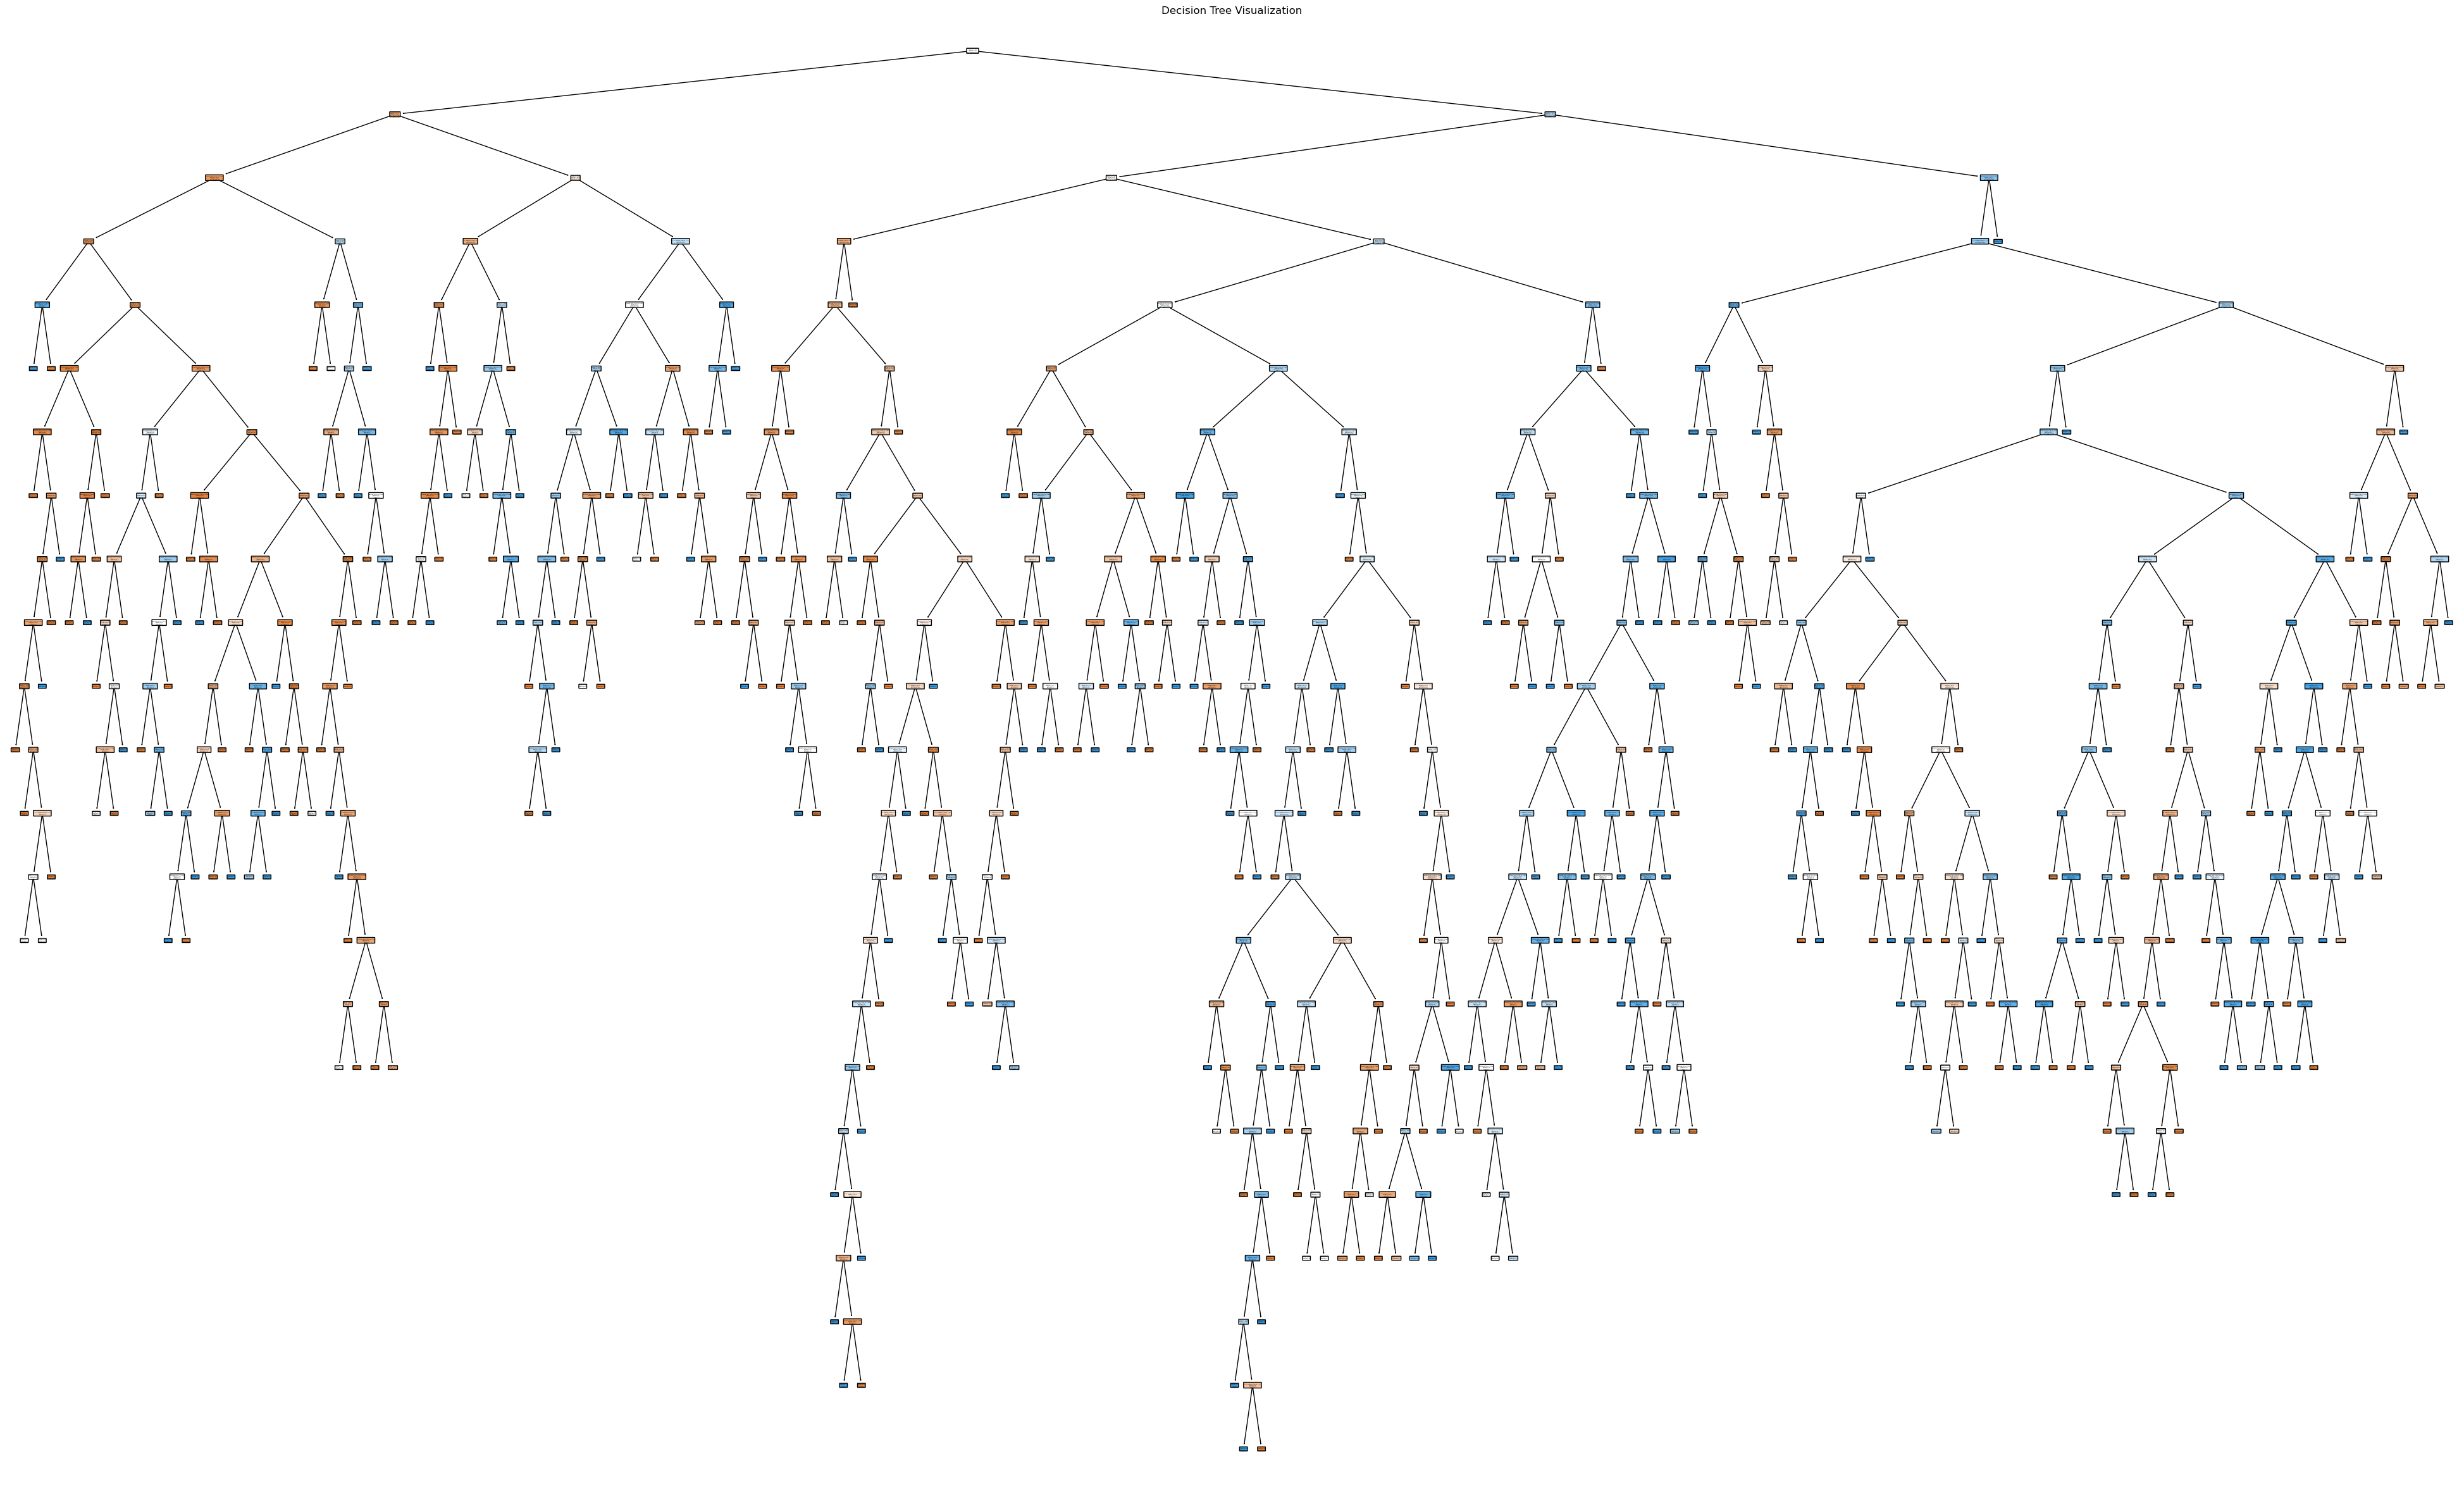

In [56]:
plt.figure(figsize=(50, 30))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## Random Forest

In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

rf_classifier = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf nodes
    'max_features': ['sqrt', 'log2', None],  # Features to consider for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # Function to measure split quality
}

random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  
                                   cv=5,  
                                   scoring='accuracy', 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = random_search.best_estimator_
best_rf_classifier.fit(X_train_scaled, y_train)

y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))



Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': False}

Confusion Matrix:
[[239  33]
 [ 11 260]]

Accuracy: 91.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       272
           1       0.89      0.96      0.92       271

    accuracy                           0.92       543
   macro avg       0.92      0.92      0.92       543
weighted avg       0.92      0.92      0.92       543


Micro Average - Precision: 0.92, Recall: 0.92, F1-Score: 0.92
Macro Average - Precision: 0.92, Recall: 0.92, F1-Score: 0.92
Weighted Average - Precision: 0.92, Recall: 0.92, F1-Score: 0.92


In [ ]:
#pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
#pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
#pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
#pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

# Load from CSV


## AdaBoost

Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.5}

Confusion Matrix:
[[211  61]
 [ 43 228]]

Accuracy: 80.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       272
           1       0.79      0.84      0.81       271

    accuracy                           0.81       543
   macro avg       0.81      0.81      0.81       543
weighted avg       0.81      0.81      0.81       543


Micro Average - Precision: 0.81, Recall: 0.81, F1-Score: 0.81
Macro Average - Precision: 0.81, Recall: 0.81, F1-Score: 0.81
Weighted Average - Precision: 0.81, Recall: 0.81, F1-Score: 0.81


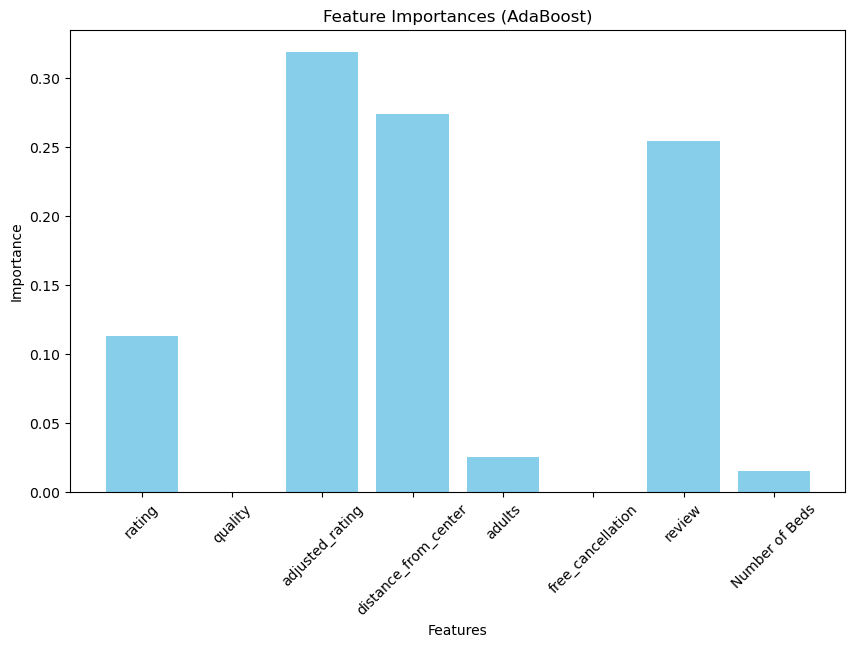

In [361]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400 , 500 , 350 , 1000],
    'learning_rate': [0.01, 0.1, 0.5, 1.0 , 0.01 , 2 , 3 , 0.001]
}

random_search = RandomizedSearchCV(
    AdaBoostClassifier(random_state=0),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    #random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = random_search.best_estimator_
best_clf.fit(X_train_scaled, y_train)

y_pred = best_clf.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))

# Feature importance visualization
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.title("Feature Importances (AdaBoost)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


## XGBoost

In [ ]:
!pip install xgboost


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 400, 'subsample': 1.0}

Confusion Matrix:
[[238  34]
 [ 16 255]]

Accuracy: 90.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.90       272
           1       0.88      0.94      0.91       271

    accuracy                           0.91       543
   macro avg       0.91      0.91      0.91       543
weighted avg       0.91      0.91      0.91       543


Micro Average - Precision: 0.91, Recall: 0.91, F1-Score: 0.91
Macro Average - Precision: 0.91, Recall: 0.91, F1-Score: 0.91
Weighted Average - Precision: 0.91, Recall: 0.91, F1-Score: 0.91


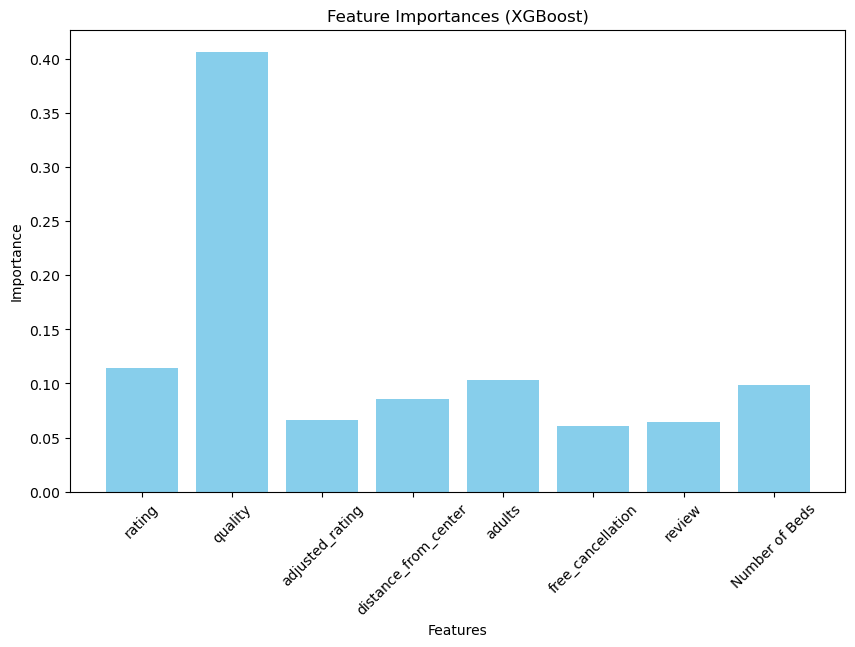

In [362]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400 , 500 , 350 , 1000],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.5, 1.0 , 0.01 , 2 , 3 , 0.001],  # Learning rate
    'subsample': [0.8, 1.0],         # Subsampling ratio
    'colsample_bytree': [0.8, 1.0]   # Subsample ratio of features
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=12, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))

# Feature importance visualization
feature_importances = best_xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


## SAMME 

In [363]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import numpy as np

class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=350, learning_rate = 1):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_classes = len(np.unique(y))
        self.weights = (1 / n_samples) * np.ones(n_samples, dtype=float)

        for _ in range(self.n_estimators):
            learner = self.base_estimator()
            learner.fit(X, y, sample_weight=self.weights)
            pred = learner.predict(X)
            missClassified = pred != y
            error = np.sum(self.weights[missClassified]) / np.sum(self.weights)

            if error >= 1 - (1 / n_classes):
                break

            alpha = self.learning_rate * (np.log((1 - error) / error) + np.log(n_classes - 1))
            self.learner_weights.append(alpha)
            self.learners.append(learner)

            self.weights[missClassified] *= np.exp(alpha)
            self.weights /= np.sum(self.weights)

    def predict(self, X):
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X))  # Collect predictions from each learner

        weighted_votes = np.zeros((X.shape[0], len(np.unique(y))), dtype=float)
        for alpha, pred in zip(self.learner_weights, predictionsOfLearners):
            for i, p in enumerate(pred):
                weighted_votes[i, p] += alpha

        return np.argmax(weighted_votes, axis=1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

boosting_model = SimpleMultiClassBoosting(n_estimators=100)
boosting_model.fit(X_train_scaled, y_train)

y_pred = boosting_model.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))



Confusion Matrix:
[[203  69]
 [ 80 191]]

Accuracy: 72.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       272
           1       0.73      0.70      0.72       271

    accuracy                           0.73       543
   macro avg       0.73      0.73      0.73       543
weighted avg       0.73      0.73      0.73       543


Micro Average - Precision: 0.73, Recall: 0.73, F1-Score: 0.73
Macro Average - Precision: 0.73, Recall: 0.73, F1-Score: 0.73
Weighted Average - Precision: 0.73, Recall: 0.73, F1-Score: 0.73


In [364]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)


param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.5,1],  # Learning rate
    'estimator__max_depth': [1, 3, 5],  # Depth of decision tree
    'estimator__min_samples_split': [2, 5, 10]  # Minimum samples for splitting
}

grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=DecisionTreeClassifier(),
        algorithm='SAMME',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nBest Hyperparameters:")
print(grid_search.best_params_)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))



Best Hyperparameters:
{'estimator__max_depth': 5, 'estimator__min_samples_split': 5, 'learning_rate': 1, 'n_estimators': 300}

Confusion Matrix:
[[235  37]
 [ 17 254]]

Accuracy: 90.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       272
           1       0.87      0.94      0.90       271

    accuracy                           0.90       543
   macro avg       0.90      0.90      0.90       543
weighted avg       0.90      0.90      0.90       543


Micro Average - Precision: 0.90, Recall: 0.90, F1-Score: 0.90
Macro Average - Precision: 0.90, Recall: 0.90, F1-Score: 0.90
Weighted Average - Precision: 0.90, Recall: 0.90, F1-Score: 0.90


In [365]:
pd.DataFrame(X_train).to_csv("Best_X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("Best_X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("Best_y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("Best_y_test.csv", index=False)

## Stacking

In [376]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import pandas as pd

X_train = pd.read_csv("dataset_split2\Best_X_train.csv")
X_test = pd.read_csv("dataset_split2\Best_X_test.csv")
y_train = pd.read_csv("dataset_split2\Best_y_train.csv")
y_test = pd.read_csv("dataset_split2\Best_y_test.csv")
y_train = y_train.values.ravel()  
y_test = y_test.values.ravel()  

base_learners = [
    ('xgb', XGBClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMicro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_micro, recall_micro, f1_micro))
print("Macro Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted Average - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(precision_weighted, recall_weighted, f1_weighted))



Confusion Matrix:
[[243  29]
 [ 11 260]]

Accuracy: 92.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       272
           1       0.90      0.96      0.93       271

    accuracy                           0.93       543
   macro avg       0.93      0.93      0.93       543
weighted avg       0.93      0.93      0.93       543


Micro Average - Precision: 0.93, Recall: 0.93, F1-Score: 0.93
Macro Average - Precision: 0.93, Recall: 0.93, F1-Score: 0.93
Weighted Average - Precision: 0.93, Recall: 0.93, F1-Score: 0.93
